In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# X is the 10 X 10 Hilbert Matrix
X = 1. / (np.arange(1, 11) + np.arange(0,10)[:, np.newaxis])
y = np.ones(10)

In [4]:
print(X.shape)
X

(10, 10)


array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [10]:
# Compute paths 
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha= a, fit_intercept= False)
#     print(ridge)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

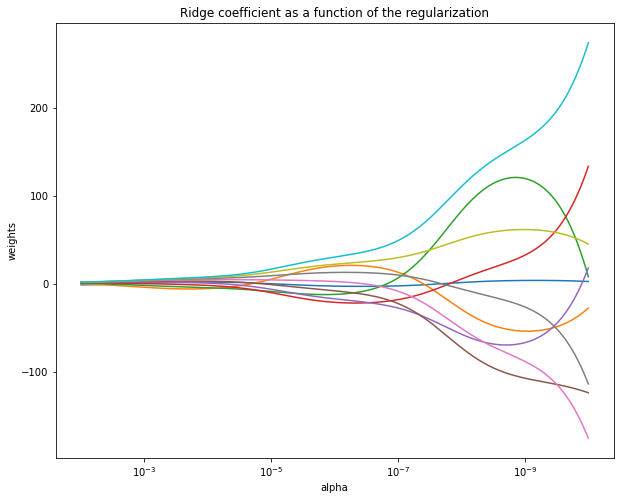

In [11]:
# Display Results
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Ridge coefficient as a function of the regularization")
plt.axis('tight')
plt.show()

# Outliers Impact

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

## Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression 

Feeature shape:  (100,)

Target shape:  (100,)
Coefficient Estimate:  [0.47134857]


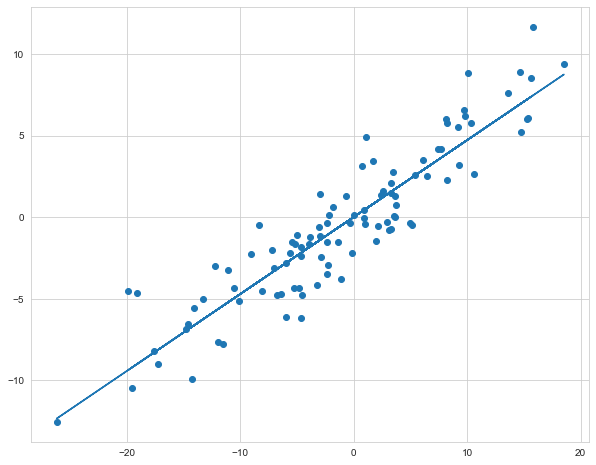

In [17]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
print("Feeature shape: ", rng.shape)
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)
print("\nTarget shape: ", y_gen.shape)

lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1, 1))

# plotting 
plt.figure(figsize= (10, 8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_);

In [23]:
idx= rng.argmax()
y_gen[idx] = 200

Coefficient Estimate:  [0.92796845]


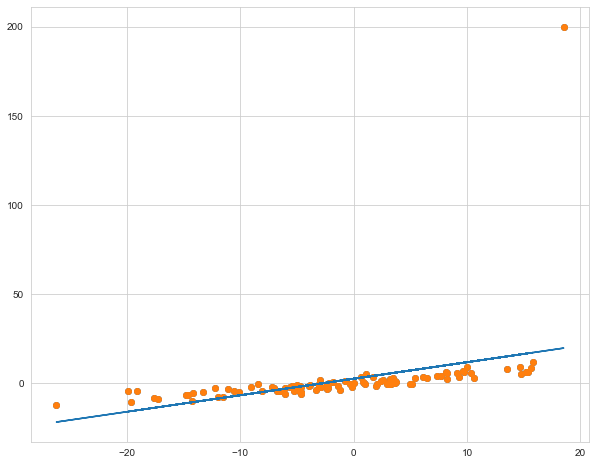

In [25]:
plt.figure(figsize=(10, 8));
plt.scatter(rng, y_gen);

o_lr = LinearRegression(normalize= True)
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1, 1))

plt.scatter(rng, y_gen);
plt.plot(rng, o_model_pred)
print("Coefficient Estimate: ", o_lr.coef_)

## Ridge Regression 

In [26]:
from sklearn.linear_model import Ridge

Coefficient of Estimation:  [0.46398423]


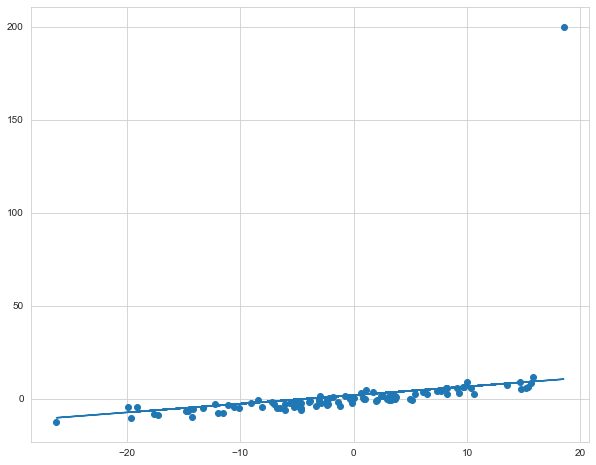

In [28]:
ridge_mod = Ridge(alpha= 1, normalize= True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_mod_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_mod_pred);
print("Coefficient of Estimation: ", ridge_mod.coef_)

In [30]:
# ridge_mod_pred

# Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

Coefficient Estimation:  [0.48530263]


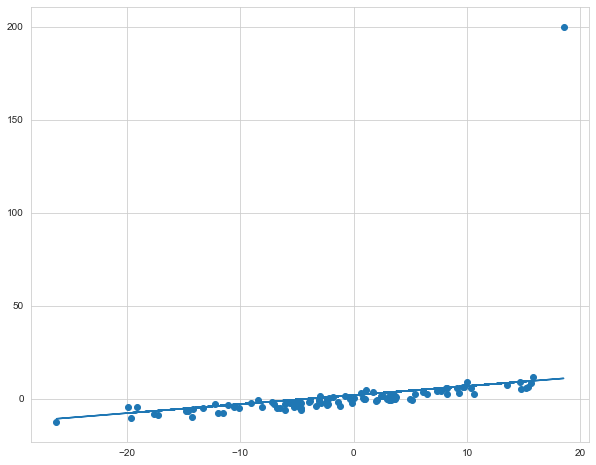

In [34]:
# define model 
lasso_mod = Lasso(alpha= 0.4, normalize= True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)  # (features, target)
lasso_mod_pred = lasso_mod.predict(rng.reshape(-1,1))   # (features)

# plotting
plt.figure(figsize=(10, 8));
plt.scatter(rng, y_gen); # (features, target)
plt.plot(rng, lasso_mod_pred); # (features, prediction)
print("Coefficient Estimation: ", lasso_mod.coef_)  # coefficent change by the rate of alpha 

# Elastic Net Regression

In [35]:
from sklearn.linear_model import ElasticNet

Coefficent Estimation:  [0.4584509]


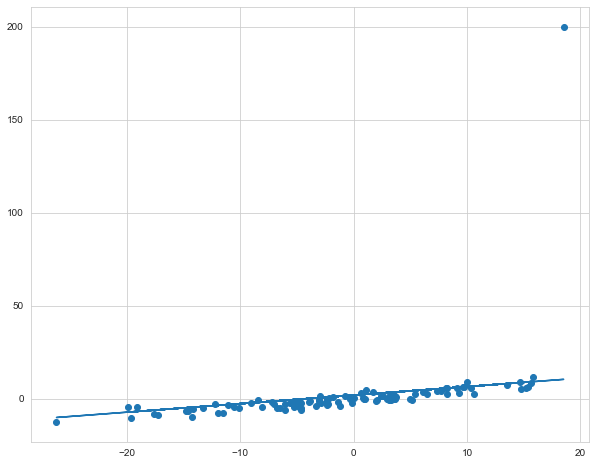

In [38]:
# defining model and prediction 
elnet_mod = ElasticNet(alpha= 0.02, normalize= True)
elnet_mod.fit(rng.reshape(-1, 1), y_gen)
elnet_pred = elnet_mod.predict(rng.reshape(-1,1))

# plotting 
plt.figure(figsize=(10, 8));
plt.scatter(rng, y_gen);
plt.plot(rng, elnet_pred);
print("Coefficent Estimation: ", elnet_mod.coef_)